<a href="https://colab.research.google.com/github/shetashreya/machine-learning-projects/blob/main/Digit_recognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
!pip install tensorflow
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [4]:
# Load MNIST dataset from tenserflow
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [5]:
# Normalize the data (convert pixel values from 0-255 to 0-1)
x_train, x_test = x_train/255.0, x_test/255.0
print(f"Training Data Shape: {x_train.shape}, Testing DataShape: {x_test.shape}")

Training Data Shape: (60000, 28, 28), Testing DataShape: (10000, 28, 28)


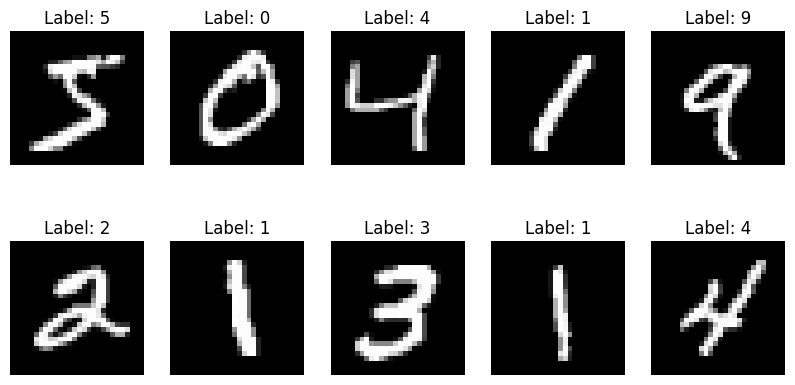

In [6]:
# showing some image of dataset
plt.figure(figsize=(10, 5))
for i in range(10):
  plt.subplot(2, 5, i+1)
  plt.imshow(x_train[i], cmap='gray')
  plt.title(f"Label: {y_train[i]}")
  plt.axis('off')
plt.show()

In [7]:
# Build a Neural Network Model
# We can creeate a simple deep learning model using tenserflow's SEQUENTIAL api
# Build the model
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28,28)), # flattten 28x28 imaged to 1D
  tf.keras.layers.Dense(128, activation='relu'), # fully connected layers
  tf.keras.layers.Dropout(0.2), # prevent overfitting
  tf.keras.layers.Dense(10, activation='softmax') # output layer (10 classes)
])

# compile the model summary
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# now print the model summary
model.summary()

'''
Explanation:
Flatten layer converts 28x28 images into a 1D array.
Dense(128, activation='relu') is a fully connected layer with 128 neurons.
Dropout(0.2) randomly drops 20% of neurons to prevent overfitting.
Dense(10, activation='softmax') gives probability scores for each digit (0-9).
Adam Optimizer is used to update model weights efficiently.'''

/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten (Flatten)                    │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │         100,480 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 101,770 (397.54 KB)

 Trainable params: 101,770 (397.54 KB)

 Non-trainable params: 0 (0.00 B)

"\nExplanation:\nFlatten layer converts 28x28 images into a 1D array.\nDense(128, activation='relu') is a fully connected layer with 128 neurons.\nDropout(0.2) randomly drops 20% of neurons to prevent overfitting.\nDense(10, activation='softmax') gives probability scores for each digit (0-9).\nAdam Optimizer is used to update model weights efficiently."

In [8]:
# Train the Model
history = model.fit(x_train, y_train, epochs=5, validation_data=(x_test, y_test))

'''
epochs=5 means the model will go through the dataset 5 times.
validation_data=(X_test, y_test) helps us see how well the model generalizes.
'''

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 13s 5ms/step - accuracy: 0.8580 - loss: 0.4816 - val_accuracy: 0.9546 - val_loss: 0.1550
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.9528 - loss: 0.1576 - val_accuracy: 0.9706 - val_loss: 0.0985
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9669 - loss: 0.1107 - val_accuracy: 0.9722 - val_loss: 0.0932
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.9717 - loss: 0.0902 - val_accuracy: 0.9752 - val_loss: 0.0822
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9763 - loss: 0.0766 - val_accuracy: 0.9756 - val_loss: 0.0816


'\nepochs=5 means the model will go through the dataset 5 times.\nvalidation_data=(X_test, y_test) helps us see how well the model generalizes.\n'

In [9]:
# evalute model performance on test set
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)
print(f"\nTest accuracy: {test_acc:.4f}")

313/313 - 1s - 2ms/step - accuracy: 0.9756 - loss: 0.0816

Test accuracy: 0.9756


313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


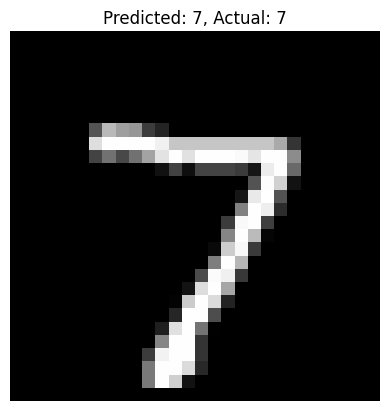

In [11]:
# Make predictions
predictions = model.predict(x_test)

# show one example
index = 0 # change index to test different images
plt.imshow(x_test[index], cmap='gray')
plt.title(f"Predicted: {np.argmax(predictions[index])}, Actual: {y_test[index]}")
plt.axis('off')
plt.show()